<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Proyecto 4: Clasificación de señales ECG</font></b></h1>
        <h2><font color='0B5345'>Proyecto 2024-02</font></h2>
        <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Chingal</font></h3>
    </div>
</div>

* Revisión teórica del artículo:

En el articulo describe el metodo de extracción de características que se utiliza para el analisis de señales ECG y a si clasificar arritmias cardiacas. Dado que los metodos tradicionales presentan limitaciones, especialmente en señales distorcionadas o con componentes omitidos. Por tanto proponen un metodo inovador el cual consta de: 

    

**Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit**

NeuroKit es una herramienta de Python diseñada para procesar y analizar datos fisiológicos y neurocientíficos. El siguiente tutorial tiene como objetivo acercarse y reconocer las herramientas que ofrece neurokit

Lo primero que se debe hacer es intalar NeuroKit, con el comando: pip install neurokit2. Una vez instalado, se puede usar la libreria en el codigo de Python.

In [91]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

Cuando la libreria se instale correctamente se puede acceder a los comandos que ofrece neuroKit. una de las funciones es generar señales sintéticas como ECG, EDA, EEG, etc., para pruebas y simulaciones. Por tanto simulamos una señal ECG

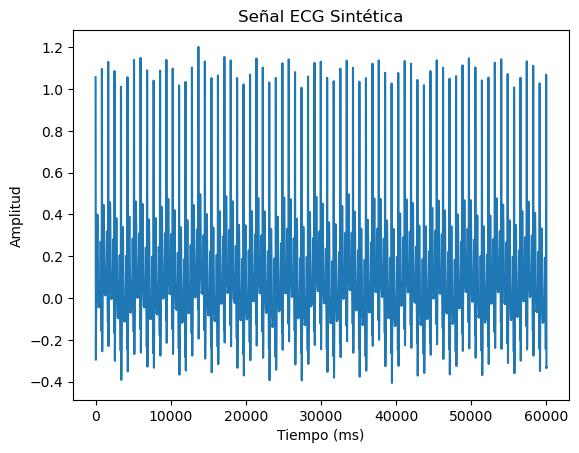

In [92]:
# Generar una señal ECG simulada (1 minuto de duración, 1000 Hz de frecuencia de muestreo)
ecg_signal = nk.ecg_simulate(duration=60, sampling_rate=1000)

# Graficar la señal
plt.plot(ecg_signal)
plt.title("Señal ECG Sintética")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.show()

NeuroKit2 tiene herramientas para analizar señales fisiológicas. Un análisis común es encontrar los picos R del ECG, que representan los latidos del corazón.
la variable processed_ecg: Contiene la señal procesada de ECG, que incluye no solo la señal limpia, sino también información adicional, como los picos R.

c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


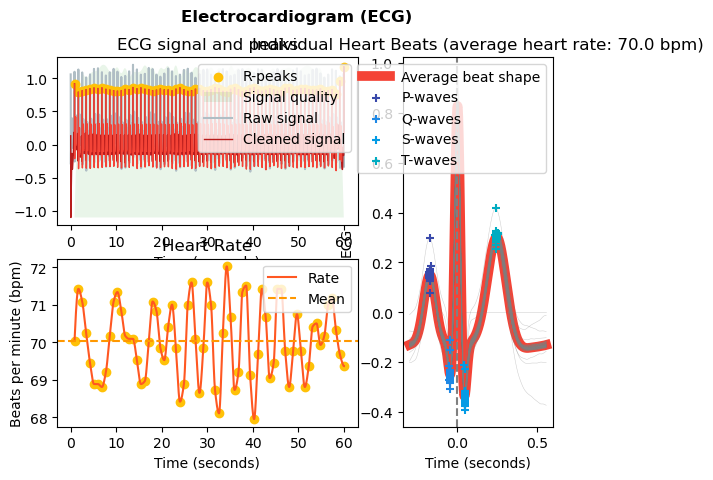

In [97]:
# Procesar la señal de ECG (detectar picos R, eliminar ruido, etc.)
processed_ecg, info = nk.ecg_process(ecg_signal)

# Verificar los picos R detectados (accedemos a la clave "ECG_R_Peaks" en el diccionario 'info')
peaks = info["ECG_R_Peaks"]

# Filtrar los valores NaN en el array de NumPy (usando np.isnan para eliminar NaNs)
peaks_cleaned = peaks[~np.isnan(peaks)]

# Mostrar la señal con los picos R
nk.ecg_plot(processed_ecg)

Los intervalos RR son la distancia en el tiempo entre dos picos R consecutivos, y se pueden calcular restando los valores consecutivos de los picos R. Usamos np.diff() para calcular la diferencia entre los picos R y luego dividimos entre 1000 para convertir los intervalos a segundos.

In [94]:
# Calcular los intervalos RR (en segundos)
rr_intervals = np.diff(peaks_cleaned) / 1000  # Los picos están en índices, así que dividimos por la tasa de muestreo (1000 Hz)

# Mostrar los intervalos RR
print("Intervalos RR (en segundos):", rr_intervals)

Intervalos RR (en segundos): [0.859 0.864 0.852 0.846 0.861 0.878 0.865 0.84  0.838 0.856 0.867 0.856
 0.844 0.859 0.881 0.881 0.855 0.837 0.844 0.859 0.856 0.84  0.84  0.863
 0.884 0.876 0.852 0.849 0.864 0.869 0.848 0.833 0.844 0.866 0.867 0.85
 0.848 0.867 0.878 0.862 0.847 0.853 0.864 0.857 0.837 0.84  0.861 0.872
 0.863 0.854 0.866 0.875 0.861 0.839 0.838 0.851 0.859 0.852 0.851 0.865
 0.877 0.871 0.857 0.852 0.856 0.848 0.845 0.849 0.859]


del paso anterior se puede calcular la variabilidad de la frecuencia cardíaca (HRV) utilizando nk.hrv().  Esta función genera varios índices relacionados con la variabilidad de la frecuencia cardíaca.

Los índices RMSSD y SDNN son dos de las métricas más comunes utilizadas para analizar la variabilidad de la frecuencia cardíaca (HRV), que es la variación en el tiempo entre los latidos del corazón. La HRV es un indicador importante de la salud cardiovascular y del sistema nervioso autónomo. 

In [100]:
# Convertir los intervalos RR a picos R nuevamente
peaks_from_rr = nk.intervals_to_peaks(rr_intervals, sampling_rate=1000)

# Calcular la HRV a partir de los picos R
hrv = nk.hrv(peaks_from_rr)

c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\signal\signal_interpolate.py:117: NeuroKitWarning: Duplicate x values detected. Averaging their corresponding y values.
  warn(
c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:387: RuntimeWarning: divide by zero encountered in divide
  theta_all = abs(np.arctan(1) - np.arctan(y / x))  # phase angle LI - phase angle of i-th point
c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\USER\anaconda3\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:154: RuntimeWarning: divide by zero encountered in log
  slope, intercept = -np.polyfit(np.log(k_values), np.log(average_values), 1)


Los índices RMSSD y SDNN son dos de las métricas más comunes utilizadas para analizar la variabilidad de la frecuencia cardíaca (HRV), que es la variación en el tiempo entre los latidos del corazón. La HRV es un indicador importante de la salud cardiovascular y del sistema nervioso autónomo.

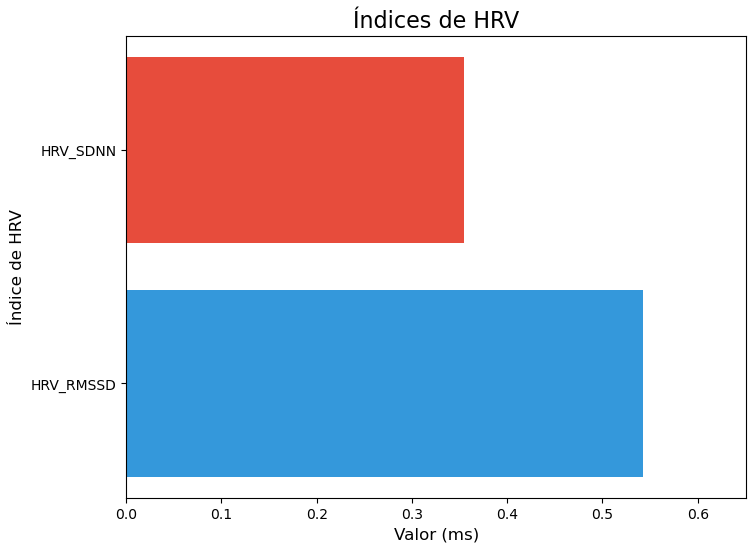

In [ ]:

# Seleccionamos las columnas de HRV que nos interesan (por ejemplo RMSSD y SDNN)
indices_interes = ['HRV_RMSSD', 'HRV_SDNN']
valores = hrv[indices_interes].values.flatten()

# Colores para las barras
colores = ['#3498db', '#e74c3c']  # Azul para RMSSD, Rojo para SDNN

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.barh(indices_interes, valores, color=colores)

# Personalizar el gráfico
plt.title("Índices de HRV", fontsize=16)
plt.xlabel("Valor (ms)", fontsize=12)
plt.ylabel("Índice de HRV", fontsize=12)
plt.xlim(0, max(valores) * 1.2)  # Extender el eje X para mejor visualización

# Mostrar la gráfica
plt.show()


Este tutorial muestra cómo generar y procesar una señal ECG simulada usando NeuroKit2, cómo calcular los intervalos RR y cómo analizar la variabilidad de la frecuencia cardíaca (HRV) a partir de estos intervalos. Además, de cómo graficar los resultados de la HRV para una interpretación visual.